In [1]:
import pandas as pd
import numpy as np

In [2]:
path1="D:/R Analytics/Analytics Vidhya/Big Mart/Train.csv"
path2="D:/R Analytics/Analytics Vidhya/Big Mart/Test.csv"
path3="D:/R Analytics/Analytics Vidhya/Big Mart/SampleSubmission_TmnO39y.csv"

In [3]:
train= pd.read_csv(path1)
test=pd.read_csv(path2)
SampleSubmission_TmnO39y=pd.read_csv(path3)

In [4]:
train.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
test["Item_Outlet_Sales"]= 0
train["Temp"]="train"
test["Temp"]="test"
combi=pd.concat([train,test],axis=0,ignore_index=True)
combi
combi.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Temp                          object
dtype: object

In [7]:
print(train.describe())
combi.describe()

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
numeric_col= combi.select_dtypes(exclude="object")
numeric_col.drop(["Item_Outlet_Sales","Outlet_Establishment_Year"],1,inplace=True)
for i in numeric_col.dtypes.index:
    combi.loc[combi[i]>combi[i].quantile(0.99),i]=combi[i].quantile(0.99)
Item_Sales_Quantile= train["Item_Outlet_Sales"].quantile(0.99)
combi.loc[combi["Item_Outlet_Sales"]>Item_Sales_Quantile,"Item_Outlet_Sales"]=Item_Sales_Quantile
combi.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.789765,0.065558,140.989719,1997.830681,1301.933904
std,4.647022,0.049957,62.056726,8.371664,1670.331217
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,20.850000,0.230385,262.759322,2009.000000,7366.011720


In [9]:
### WIP, will code this later #######
def mystats(x):
    nmiss=x.isnull().sum()
    mean=x.mean()
    std=x.std()
    out=mean+3*std
    quant=x.quantile(.99)
    maximum=x.max()
    minimum=x.min()
    return(nmiss,mean,std,out,quant,maximum,minimum)

In [10]:
combi.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    411
Item_Fat_Content                 5
Item_Visibility              12869
Item_Type                       16
Item_MRP                      7960
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3412
Temp                             2
dtype: int64

In [11]:
cat_data=combi.select_dtypes(include="object")
cat_data.drop(["Outlet_Identifier","Item_Identifier"],axis=1, inplace=True)
for i in cat_data:
    print(combi[i].value_counts(dropna=False))

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
train    8523
test     5681
Name: Temp, dtype: int64


In [12]:
categorical_columns= [x for x in combi.dtypes.index if combi.dtypes[x]=="object"]
categorical_col=[x for x in categorical_columns if x not in ["Item_Identifier","Outlet_Identifier"]]
for i in categorical_col:
    print("Frequency of categories %s"%i)
    print(combi[i].value_counts())
    
##### This is another code for specify and categorical variable.

Frequency of categories Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of categories Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of categories Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of categories Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of categories Outlet_Type
Supermarket Type1 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
import seaborn as sns

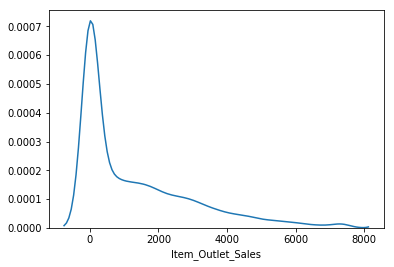

In [15]:
sns.distplot(combi["Item_Outlet_Sales"],hist=False, kde=True, bins=20) ####This is skewed ###

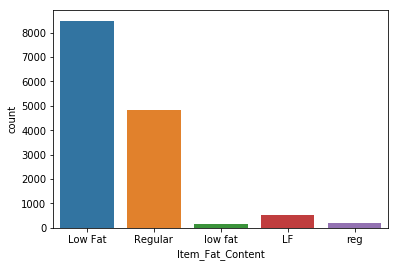

In [16]:
sns.countplot(combi["Item_Fat_Content"])

#too many repeat levels, need to convert it in two

In [17]:
combi["Item_Fat_Content"].value_counts(dropna=False)

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
combi.loc[combi["Item_Fat_Content"]=="reg","Item_Fat_Content"]="Regular"
combi.loc[combi["Item_Fat_Content"]=="LF","Item_Fat_Content"]="Low Fat"
combi.loc[combi["Item_Fat_Content"]=="low fat","Item_Fat_Content"]="Low Fat"

In [19]:
combi.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [20]:
combi.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Temp                          object
dtype: object

In [21]:
combi.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Temp                            0
dtype: int64

In [22]:
combi.apply(lambda x: sum(x.isnull())) ### Both code will give the same result

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Temp                            0
dtype: int64

In [23]:
item_avg_weight= combi.groupby(["Item_Identifier"])["Item_Weight"].mean()

In [24]:
combi.pivot_table(values="Item_Weight",index="Item_Identifier", aggfunc="mean")  #### Another method for grouping

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [25]:
missing_value= combi["Item_Weight"].isnull()

In [26]:
missing_value

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20       False
21        True
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29        True
         ...  
14174    False
14175    False
14176    False
14177    False
14178     True
14179     True
14180    False
14181    False
14182    False
14183    False
14184     True
14185    False
14186    False
14187    False
14188     True
14189    False
14190    False
14191    False
14192     True
14193    False
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [27]:
combi.loc[missing_value,"Item_Weight"]=combi.loc[missing_value,"Item_Identifier"].apply(lambda x:item_avg_weight[x])

In [28]:
combi.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Temp                            0
dtype: int64

In [29]:
print(combi["Item_Weight"].mean())
combi["Item_Weight"].isnull().sum(axis=0)
combi["Item_Weight"].dtypes

12.790265066179371


dtype('float64')

In [30]:
combi["Outlet_Size"].value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [31]:
from scipy.stats import mode

In [32]:
outlet_size_mode = combi.pivot_table(values="Outlet_Size",index="Outlet_Type",aggfunc=(lambda x : mode(x).mode[0]))

In [33]:
outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [34]:
outlet_size1= combi.groupby(["Outlet_Type"])["Outlet_Size"].apply(lambda x : mode(x).mode[0]) ### Another Method
outlet_size1

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [35]:
missing_size= combi["Outlet_Size"].isnull()
missing_size

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7        False
8         True
9         True
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25        True
26       False
27       False
28        True
29       False
         ...  
14174    False
14175     True
14176    False
14177    False
14178    False
14179    False
14180    False
14181    False
14182    False
14183    False
14184    False
14185     True
14186    False
14187    False
14188    False
14189    False
14190    False
14191     True
14192    False
14193     True
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [36]:
combi.loc[missing_size,"Outlet_Size"]= combi.loc[missing_size,"Outlet_Type"].apply(lambda x: outlet_size1[x])

In [37]:
combi["Outlet_Size"].value_counts(dropna=False)

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

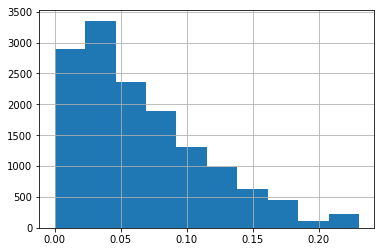

In [38]:
combi["Item_Visibility"].hist() ### Item_Visibility cannot be zero,need to impute zero with the mean of item_vis based on It iden

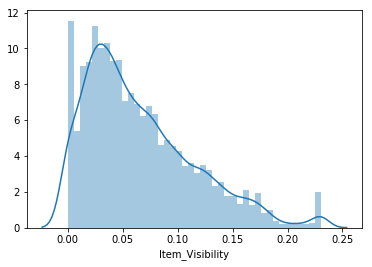

In [39]:
sns.distplot(combi["Item_Visibility"],kde=True,hist=True)  ### Another Method

In [40]:
Item_avg_visibility= combi.groupby(["Item_Identifier"])["Item_Visibility"].mean()

In [41]:
zero_item_visibility= combi["Item_Visibility"]==0

In [42]:
print(sum(combi["Item_Visibility"]==0))
combi.loc[zero_item_visibility,"Item_Visibility"]=combi.loc[zero_item_visibility,"Item_Identifier"].apply(lambda x : Item_avg_visibility[x])
print(sum(combi["Item_Visibility"]==0))

879
0


In [43]:
combi.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Temp'],
      dtype='object')

In [44]:
combi["Item_Identifier"].value_counts() ## Based on the data understanding, Item starting from FD is food item, NC is non conumeable and DR is drink.

NCH30    10
FDF22    10
FDV09    10
DRE13    10
NCD43    10
NCQ05    10
NCC31    10
NCM43    10
FDE11    10
FDQ08    10
FDT13    10
FDG46    10
FDP39    10
NCO14    10
FDO36    10
FDS55    10
NCJ19    10
FDQ04    10
FDH10    10
FDZ07    10
FDO15    10
NCO30    10
FDT50    10
NCU29    10
FDR47    10
NCK31    10
FDL36    10
FDD17    10
FDR13    10
FDU45    10
         ..
FDA51     8
FDV33     8
FDP22     8
NCV17     8
DRI59     8
FDM45     8
FDO22     8
NCG19     8
NCT17     8
FDG05     8
FDV27     8
DRB01     8
NCN17     8
FDS34     8
NCT05     8
FDC58     8
FDJ40     8
FDM52     7
NCL42     7
FDI46     7
FDX49     7
DRN11     7
FDH58     7
FDM50     7
FDO33     7
FDR51     7
FDL50     7
FDS22     7
FDM10     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
combi["Item_Category"]=combi["Item_Identifier"].apply(lambda x : x[0:2])

In [46]:
combi["Item_Category_New"]=combi["Item_Category"].map({"FD":"Food","NC":"Non-Consume","DR":"Drink"})

In [47]:
combi.loc[combi["Item_Category"]=="NC","Item_Fat_Content"]="Non-Edible" ## There will no fat in NC product ##

In [48]:
## combi["Item_Category_New_1"]= np.where(combi["Item_Category"].isin(["FD"]),"FOOD","DRINK") ##Another Method##

In [49]:
## combi.loc[combi["Item_Category"]=="NC","Item_Category_New_1"]="Non_Consume" ## Another Method###

In [50]:
combi["Item_Category_New"].value_counts()

Food           10201
Non-Consume     2686
Drink           1317
Name: Item_Category_New, dtype: int64

In [51]:
combi.drop(["Item_Category"],axis=1, inplace = True)

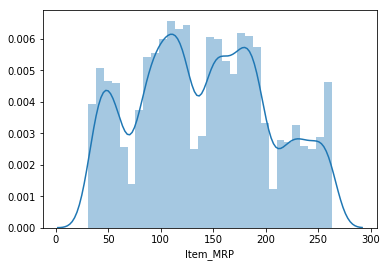

In [52]:
sns.distplot(combi["Item_MRP"], kde=True,hist=True) ##  we can see 4 different clusters #### Will make categorical variable

In [53]:
combi["Item_MRP_Clusters"]=0

In [54]:
combi.loc[combi["Item_MRP"]<67,"Item_MRP_Clusters"]=1

In [55]:
combi.loc[(combi["Item_MRP"]> 67) & (combi["Item_MRP"]< 146),"Item_MRP_Clusters"]=2
combi.loc[(combi["Item_MRP"]>146) & (combi["Item_MRP"]<203),"Item_MRP_Clusters"]=3
combi.loc[(combi["Item_MRP"]>203),"Item_MRP_Clusters"]=4

In [56]:
combi["Price_Per_Unit_Weight"]=combi["Item_MRP"]/combi["Item_Weight"]

In [57]:
combi.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Temp                          object
Item_Category_New             object
Item_MRP_Clusters              int64
Price_Per_Unit_Weight        float64
dtype: object

In [58]:
combi["Number_Of_Years"]= 2013- combi["Outlet_Establishment_Year"]

In [59]:
combi["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [60]:
combi["Item_Low_Fat"]= np.where(combi["Item_Fat_Content"]=="Low Fat",1,0)

In [61]:
combi["Item_Regular_Fat"]=np.where(combi["Item_Fat_Content"]=="Regular",1,0) 
combi["Item_Non_Edible"]=np.where(combi["Item_Fat_Content"]=="Non-Edible",1,0)
combi.drop(["Item_Fat_Content"],axis=1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp,Item_Category_New,Item_MRP_Clusters,Price_Per_Unit_Weight,Number_Of_Years,Item_Low_Fat,Item_Regular_Fat,Item_Non_Edible
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,4,26.861204,14,1,0,0
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drink,1,8.153581,4,0,1,0
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,2,8.092457,14,1,0,0
3,FDX07,19.200,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,3,9.484115,15,0,1,0
4,NCD19,8.930,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consume,1,6.031512,26,0,0,1
5,FDP36,10.395,0.057059,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,Food,1,4.944762,4,0,1,0
6,FDO10,13.650,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,Food,1,4.224088,26,0,1,0
7,FDP10,19.000,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,Food,2,5.671695,28,1,0,0
8,FDH17,16.200,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train,Food,2,5.985963,11,0,1,0
9,FDU28,19.200,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train,Food,3,9.782365,6,0,1,0


In [62]:
print(combi["Outlet_Location_Type"].value_counts())
combi["Outlet_Location_Num"]=np.where(combi["Outlet_Location_Type"]=="Tier 3",1,2)
combi.loc[combi["Outlet_Location_Type"]=="Tier 1","Outlet_Location_Num"]=3
combi.drop(["Outlet_Location_Type"],1, inplace=True)

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


In [63]:
dummy=pd.get_dummies(combi[["Outlet_Size","Outlet_Type","Outlet_Identifier","Item_Category_New","Item_Type","Outlet_Location_Num"]],drop_first=False)
combi=pd.concat([combi,dummy],axis=1)

In [64]:
combi.drop(["Outlet_Size","Outlet_Type","Item_Fat_Content","Outlet_Establishment_Year","Item_Category_New","Item_Type","Outlet_Location_Num"],axis=1,inplace=True)

In [65]:
training=combi.loc[combi["Temp"]=="train"]
testing=combi.loc[combi["Temp"]=="test"]

In [66]:
training.to_csv("D:/Python/Big Mart/Modified_train.csv",index=False,header=True)
testing.to_csv("D:/Python/Big Mart/Modified_test.csv",index=False,header=True)

In [67]:
# ### transform Skewed variable for linear regression ######
# sns.distplot(training["Item_Outlet_Sales"],hist=True)

In [68]:
# training["Ln_Item_Outlet_Sales"]=np.log(train["Item_Outlet_Sales"])
# sns.distplot(training["Ln_Item_Outlet_Sales"],hist=True)

In [69]:
training.drop(["Outlet_Identifier","Item_Identifier","Temp",], 1,inplace=True)
testing.drop(["Outlet_Identifier","Item_Identifier","Temp","Item_Outlet_Sales"], 1,inplace=True)

In [70]:
x_train=training.drop(["Item_Outlet_Sales"],1)
y_train=training["Item_Outlet_Sales"]

In [71]:
np.random.seed(324)

In [72]:
from sklearn.model_selection import KFold, train_test_split

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=43)

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [75]:
# print(help(RandomForestRegressor))
# help(XGBRegressor)
# # help(KNeighborsRegressor)
#help(DecisionTreeRegressor)

In [76]:
clf1=Lasso(fit_intercept=True,alpha=0.05)
clf2=DecisionTreeRegressor(max_depth=8,min_impurity_decrease=1)
clf3=RandomForestRegressor(n_estimators=500,max_depth=8, random_state=42)
clf4=XGBRegressor(max_depth=6,learning_rate=.1, n_estimator=500, verbosity=0,subsample=0.80,colsample_bytree=0.70, random_state=42)
clf5=KNeighborsRegressor(n_neighbors=5)

In [77]:
Algos=[clf1,clf2,clf3,clf4,clf5]

In [78]:
X_train.shape[0]

6392

In [79]:
rows=X_train.shape[0]

In [80]:
layer1= pd.DataFrame({"clf1":np.zeros(rows),"clf2":np.zeros(rows),"clf3":np.zeros(rows),"clf4":np.zeros(rows),"clf5":np.zeros(rows)})

In [81]:
kf=KFold(n_splits=10)

In [82]:
# help(KFold)

In [83]:
fold=1
for train,left_out_chunk in kf.split(X_train):
    print('fold number : ', fold)
    
    for i,clf in enumerate(Algos):
        print('Algo number :',i+1)
        
        x_train_train=X_train.iloc[train]
        y_train_train=Y_train.iloc[train]
        x_train_left_out_chunk=X_train.iloc[left_out_chunk]
        
        clf.fit(x_train_train,y_train_train)
        p=clf.predict(x_train_left_out_chunk)
        
        layer1.iloc[left_out_chunk,i]=p
        
    fold+=1

fold number :  1
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  2
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  3
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  4
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  5
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  6
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  7
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  8
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  9
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5
fold number :  10
Algo number : 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo number : 2
Algo number : 3
Algo number : 4
Algo number : 5


In [84]:
layer1

,clf1,clf2,clf3,clf4,clf5
0,-117.554935,239.597722,197.216824,221.386353,813.34128
1,2032.941893,2125.440035,2158.882487,2139.000977,2721.12460
2,847.621595,962.501836,973.180468,839.209656,894.70204
3,2351.301086,2125.440035,2167.149729,2549.667236,1821.22932
4,1844.863994,1651.354927,1635.503189,1739.707886,1918.30296
5,3197.029661,3147.442474,3112.722495,3468.849854,3278.26604
6,520.569493,654.281071,619.369942,493.756348,611.47072
7,2794.709199,2809.325579,2604.875888,2608.416748,1652.64876
8,2266.429383,1787.208488,1358.527754,1334.323975,583.50712
9,2977.945557,3147.442474,3274.397704,3531.194336,1711.77180


In [85]:
rows1=X_test.shape[0]

layer_2=pd.DataFrame({"clf1":np.zeros(rows1),"clf2":np.zeros(rows1),"clf3":np.zeros(rows1),"clf4":np.zeros(rows1),"clf5":np.zeros(rows1)})

In [86]:
layer_2

,clf1,clf2,clf3,clf4,clf5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [87]:
for i,clf in enumerate(Algos):
    print("Algo Number",i+1)
    clf.fit(X_train,Y_train)
    p=clf.predict(X_test)
    
    layer_2.iloc[:,i]=p

Algo Number 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algo Number 2
Algo Number 3
Algo Number 4
Algo Number 5


In [88]:
layer_2

,clf1,clf2,clf3,clf4,clf5
0,1003.241377,916.578139,862.398677,891.201843,966.208960
1,2906.458919,3102.664205,3028.969006,3148.787842,2999.295840
2,1463.756170,1585.578341,1625.790887,1559.179932,1229.466280
3,1866.704490,1919.870556,1952.366528,2071.328613,1994.204160
4,2909.990116,3102.664205,3102.603284,2977.837891,3147.636080
5,1189.513287,1251.235379,1287.007847,1207.060913,1071.005880
6,2857.583030,2377.031623,2447.267980,2511.162354,2752.017720
7,893.428970,719.814078,734.994975,734.205566,634.107920
8,2048.703855,1919.870556,1908.197554,1887.961548,1707.510680
9,1886.678406,658.521803,571.784614,437.807892,5461.078024


In [89]:
lm=LinearRegression()

In [90]:
model1= lm.fit(layer1,Y_train)

In [91]:
from math import sqrt

In [92]:
rmse=sqrt(mean_squared_error(Y_test,model1.predict(layer_2)))

In [93]:
rmse

1025.6822735060782

In [94]:
xgb2=XGBRegressor(n_estimators=1000,max_depth=6,learning_rate=.01, gamma=2,subsample=0.80, colsample_bytree=0.70,reg_lambda=2)

In [95]:
model2=xgb2.fit(layer1,Y_train)

[18:01:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
rmse=sqrt(mean_squared_error(Y_test,model2.predict(layer_2)))

In [97]:
rmse

1033.2061953517282

In [98]:
rows3=testing.shape[0]

In [99]:
layer_3= pd.DataFrame({"clf1":np.zeros(rows3),"clf2":np.zeros(rows3),"clf3":np.zeros(rows3),"clf4":np.zeros(rows3),"clf5":np.zeros(rows3)})

In [100]:
for i,clf in enumerate(Algos):
    print("Number of algos",i+1)
    clf.fit(X_train,Y_train)
    p=clf.predict(testing)
    
    layer_3.iloc[:,i]=p

Number of algos 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Number of algos 2
Number of algos 3
Number of algos 4
Number of algos 5


In [101]:
SampleSubmission_TmnO39y["Item_Outlet_Sales"]= model1.predict(layer_3)

In [102]:
SampleSubmission_TmnO39y.to_csv("D:/Python/Big Mart/SampleSubmission_TmnO39y.csv",header =True, index=False)

In [103]:
SampleSubmission_TmnO39y["Item_Outlet_Sales"]

0       1666.691509
1       1429.097647
2        896.350792
3       2428.363403
4       5548.480143
5       1948.974626
6        725.387095
7       2189.382525
8       1581.951892
9       3117.831535
10      1913.145946
11      1380.242341
12       858.457681
13      2030.370467
14       835.087379
15      2456.136002
16      3113.140556
17      2924.617190
18      3017.911254
19       625.849995
20      2657.596036
21      3787.187985
22       762.749535
23       322.107302
24      2953.554867
25       634.786986
26       784.365270
27      2497.356769
28      3854.364991
29      1898.426593
           ...     
5651    3324.563977
5652    1973.637981
5653    1378.425730
5654    2511.515790
5655    3761.127943
5656    5442.752768
5657    4188.194214
5658    2061.807242
5659    3157.741046
5660    3676.094998
5661    4323.079710
5662    3766.185580
5663     984.785859
5664    2701.651597
5665    1221.040942
5666    3046.842480
5667    1349.886030
5668     205.703225
5669    4988.848897


In [104]:
# lm=LinearRegression()

In [105]:
# lm.fit(x_train,y_train)

In [106]:
# coef=lm.coef_
# features= x_train.columns
# list(zip(coef,features))

In [107]:
# lm.intercept_

In [108]:
# lm.score(x_train,y_train)

In [109]:
##import statsmodels.api as sm
## from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [110]:
## model1=sm.OLS(y_train,x_train)

In [111]:
## result= model1.fit()

In [112]:
 ## print(result.summary())

In [113]:
# pip install xgboost

In [114]:
# import xgboost as xgb

In [115]:
# from xgboost.sklearn import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV

In [116]:
# param_dist = {
#               "max_depth": [6],
#               "learning_rate":[0.1],
#               "subsample":[0.7,0.8],
#     "reg_alpha":[0,1],
#     'min_child_weight':[4,5],
#  "colsample_bytree":[0.7,0.8],
#     "n_estimators":[1000],
#     "gamma":[0,1]
#               }

In [117]:
# x_train1,x_val,y_train1,y_val= train_test_split(x_train,y_train,test_size=0.30,random_state=1234)

In [118]:
# xgb=XGBRegressor(nthread=-1)

In [119]:
# from sklearn.metrics import mean_square_error

In [120]:
# XGBRegressor.fit(X_train, y_train,
#         eval_set=[(X_train, y_train), (X_test, y_test)],
#         eval_metric='logloss',
#         verbose=True)

In [121]:
import os

In [122]:
print (os.getcwd())

D:\Users\703096873
